In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/spotify_dataset.csv")

In [3]:
# Eliminar columnas que no aportan información relevante
cols_to_drop = [
    'Artist(s)', 'Album', 'song', 'Release Date',
    'Similarity Score 1', 'Similarity Score 2', 'Similarity Score 3',
    'Similar Artist 1', 'Similar Artist 2', 'Similar Artist 3',
    'Similar Song 1', 'Similar Song 2', 'Similar Song 3'
]
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [4]:
# Eliminar filas donde la columna 'emotion' sea una de las clases con escasa representación
df = df[~df['emotion'].isin(['True', 'Love', 'pink', 'thirst', 'angry', 'confusion', 'interest'])]

In [5]:
# Renombrar la columna 'Text' a 'Lyrics' y 'Loudness (db)' a 'Loudness'
df.rename(columns={'text': 'Lyrics'}, inplace=True)
df.rename(columns={'Loudness (db)': 'Loudness'}, inplace=True)

In [6]:
# Convertir la columna 'Length' a numérica, transformando por ejemplo "3:45" a 225 segundos
def convert_length_to_seconds(length):
    minutes, seconds = map(int, length.split(':'))
    return minutes * 60 + seconds

df['Length'] = df['Length'].apply(convert_length_to_seconds)

In [7]:
# Convert la columna 'Explicit' a binaria (0-1)
df['Explicit'] = df['Explicit'].map({'No': 0, 'Yes': 1})

In [8]:
# Eliminar caracteres 'db' en la columna 'Loudness' y convertir a numérico
df['Loudness'] = df['Loudness'].str.replace('db', '').astype(float)

# Exploración de datos 2

In [9]:
print("Dataset Info:")
df.info(verbose=True)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 551417 entries, 0 to 551442
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Lyrics                          551417 non-null  object 
 1   Length                          551417 non-null  int64  
 2   emotion                         551417 non-null  object 
 3   Genre                           551417 non-null  object 
 4   Key                             551417 non-null  object 
 5   Tempo                           551417 non-null  int64  
 6   Loudness                        551417 non-null  float64
 7   Time signature                  551409 non-null  object 
 8   Explicit                        551417 non-null  int64  
 9   Popularity                      551417 non-null  int64  
 10  Energy                          551417 non-null  int64  
 11  Danceability                    551417 non-null  int64  
 12  Positiv

In [10]:
# show all columns
pd.set_option('display.max_columns', None)
df.head()

,Lyrics,Length,emotion,Genre,Key,Tempo,Loudness,Time signature,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Social Gatherings,Good for Morning Routine
0,Friends told her she was better off at the bot...,227,sadness,hip hop,D min,105,-6.85,4/4,0,40,83,71,87,4,16,11,0,0,0,0,0,0,0,0,0,0
1,"Well I heard it, playing soft From a drunken b...",243,sadness,hip hop,A# min,117,-5.75,4/4,0,42,85,70,87,4,32,0,0,0,0,0,0,0,0,0,0,0
2,"Oh my god, did I just say that out loud? Shoul...",351,joy,hip hop,A Maj,121,-6.06,4/4,0,29,89,71,63,8,64,0,20,0,0,0,1,0,0,0,0,0
3,[Verse 1] Remember when I called you on the te...,224,joy,hip hop,A min,122,-5.42,4/4,0,24,84,78,97,4,12,12,0,0,0,0,1,0,0,0,0,0
4,[Verse 1] Calling me like I got something to s...,360,joy,hip hop,F min,123,-5.57,4/4,0,30,71,77,70,7,10,4,1,0,0,0,1,0,0,0,0,0


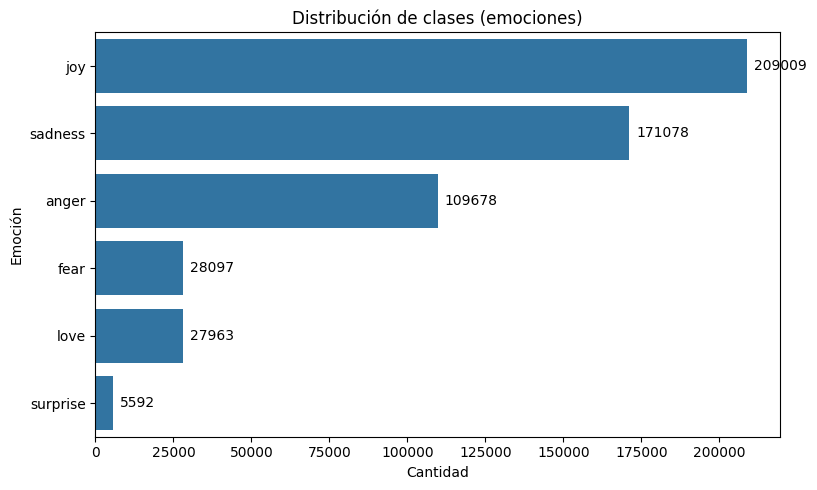

In [11]:
plt.figure(figsize=(8,5))
ax = sns.countplot(y='emotion', data=df, order=df['emotion'].value_counts().index)
plt.title("Distribución de clases (emociones)")
plt.xlabel("Cantidad")
plt.ylabel("Emoción")
plt.tight_layout()
# Agregar los conteos a cada barra
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(str(count), (p.get_width(), p.get_y() + p.get_height()/2),
                va='center', ha='left', fontsize=10, color='black', xytext=(5,0), textcoords='offset points')
plt.show()

In [12]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de variables numéricas:")
print(df.describe())

Estadísticas descriptivas de variables numéricas:
              Length          Tempo       Loudness       Explicit  \
count  551417.000000  551417.000000  551417.000000  551417.000000   
mean      223.611004     120.513490      -8.075325       0.293897   
std        87.310273      29.185619       4.086606       0.455546   
min         5.000000      31.000000     -50.060000       0.000000   
25%       178.000000      97.000000      -9.850000       0.000000   
50%       214.000000     120.000000      -7.190000       0.000000   
75%       254.000000     140.000000      -5.370000       1.000000   
max      3572.000000     200.000000       4.980000       1.000000   

          Popularity         Energy   Danceability   Positiveness  \
count  551417.000000  551417.000000  551417.000000  551417.000000   
mean       32.258104      62.661748      59.195788      47.738798   
std        18.033930      22.399135      17.511094      24.159615   
min         0.000000       0.000000       6.000000  

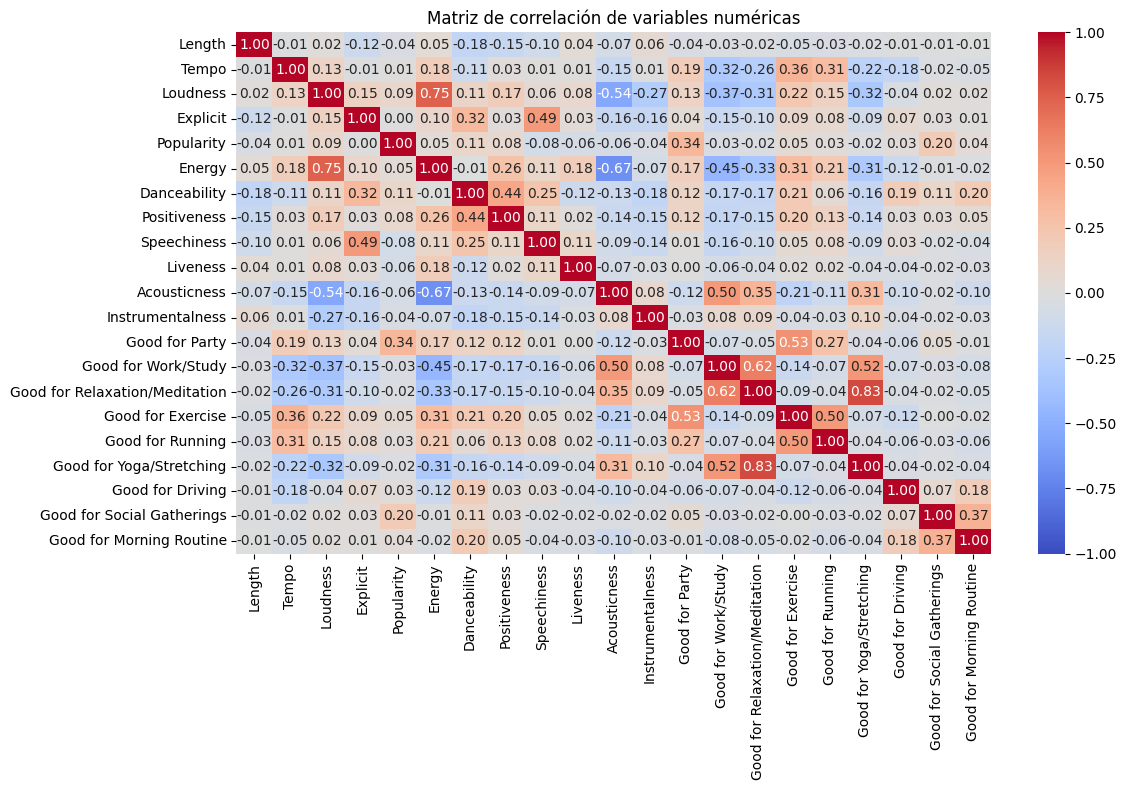

In [13]:
# Filtrar solo columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,8))
corr = num_cols.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.show()

In [15]:
# Guardar el DataFrame modificado en formato eficiente
df.to_parquet("../data/df_step1.parquet")

Queda pendiente para la etapa de Preprocesamiento el tratamiento de valores nulos en la columna Time signature.
Tambien prepararemos los datos para aplicar embedding sobre todo el dataset.